### Fraude detection

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues. The feature 'Amount' is the transaction Amount.'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

Data from : https://www.kaggle.com/mlg-ulb/creditcardfraud

In [19]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("creditcard.csv")

##### Info about the dataset variables : 

`Time` : Number of seconds elapsed between this transaction and the first transaction in the dataset\
`V1-V28` : Result of a PCA Dimensionality reduction to protect user identities and sensitive features\
`Amount` : Transactions amount\
`Class` : 0 for regular operations, 1 for fraudulent

In [32]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [106]:
#data.isna().sum()

##### Info about dataset variables types :

- The variables `V1-V28`, `Time` and `Amount` are *float* variable
- The type of `Class` variable is *Int64*
- There is no missing/Nan value in the dataset

In [3]:
describe = data.describe()

In [34]:
describe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [108]:
describe.Amount

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

*Converting time data to from seconds to hours* : 

In [35]:
data.Time = data.Time/3600

In [42]:
features = data.drop("Class",axis=1)
target = data.Class

In [156]:
count = target.value_counts(normalize=True)
count = count*100
count

0    99.827251
1     0.172749
Name: Class, dtype: float64

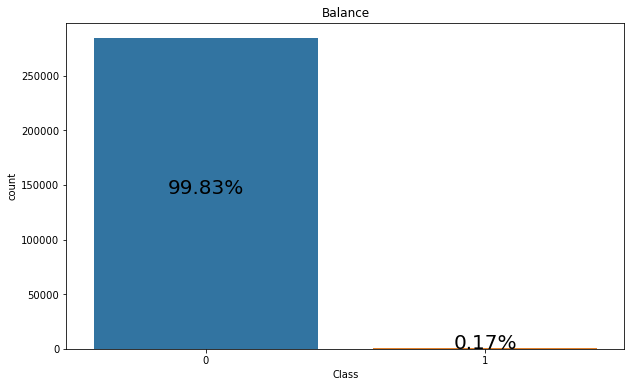

In [183]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
g = sns.countplot(target)
ax.set_title("Balance")
for i in range(2) :
    p = g.patches[i]
    x, y = p.get_xy()
    width, height = p.get_width(), p.get_height()
    ax.text(x+width/2,y+height/2,"{}%".format(round(count[i],2)),fontsize=20,horizontalalignment='center')

##### Remark : 

The fraudulent operation class is extremely under-represented.\
Our working presents a large imbalance between class 0 and 1.

##### Time Variable

Text(0.5, 1.0, 'Transaction times')

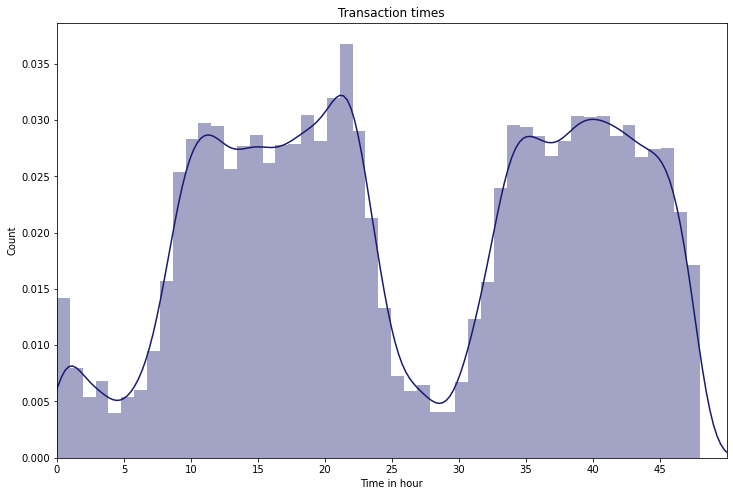

In [237]:
#histogram of transition times. 
plt.figure(figsize=(12,8))
sns.distplot(data['Time'],bins=50,color='midnightblue')
plt.xlim([0,50])
plt.xticks(np.arange(0,50,5))
plt.xlabel('Time in hour')
plt.ylabel('Count')
plt.title('Transaction times');

Transactions are mostly done by 24 hours and we notice that there are a lot less transactions between two consecutive 24 hours (days). There is a drop in the number of transactions overnight

##### Amount variable

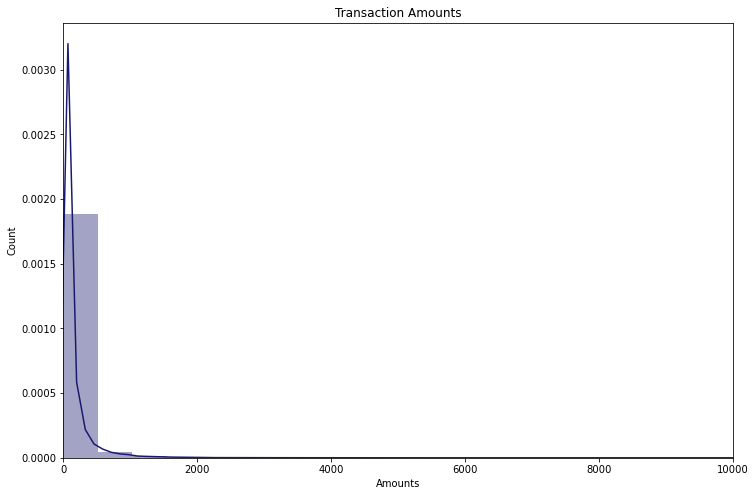

In [236]:
#histogram of transition times. 
plt.figure(figsize=(12,8))
sns.distplot(data['Amount'],bins=50,color='midnightblue')
plt.xlim([0,10000])
plt.xlabel('Amounts')
plt.ylabel('Count')
plt.title('Transaction Amounts');

The vast majority of transactions have an amount less than 2000

##### Analyse : V1-V28

Remarks about V1-V28 : 

- mean value of this variables is almost 0
- their std don't exceed 2

In [98]:
V = ['V%i' %i for i in range(1,29)]

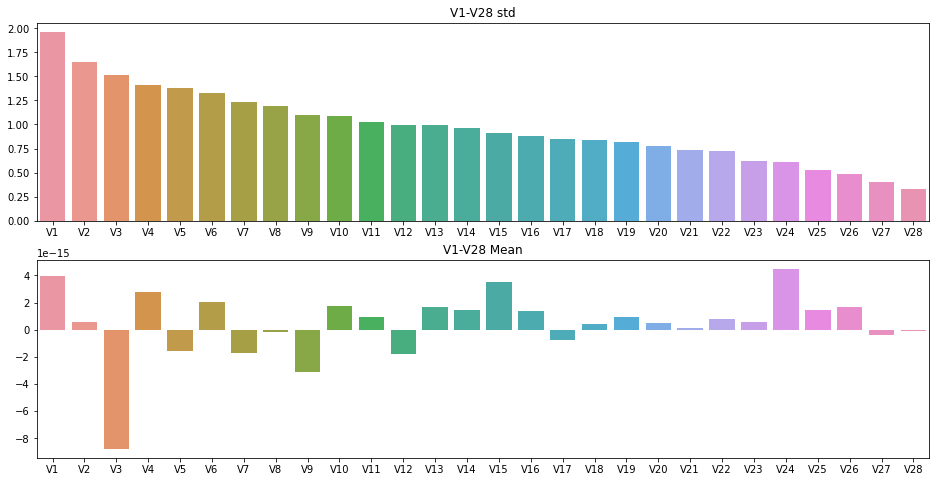

In [102]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(211)
sns.barplot(x=V, y=features[V].std())
ax.set_title('V1-V28 std')
ax = fig.add_subplot(212)
sns.barplot(x=V, y=features[V].mean())
ax.set_title('V1-V28 Mean');

The set of values is centered around 0 (mean). By taking a look at the standard deviation we also see that the varialbes have a low variability [0 - 1.9]. Thus, for some variables we are very close to a Gaussian distribution.

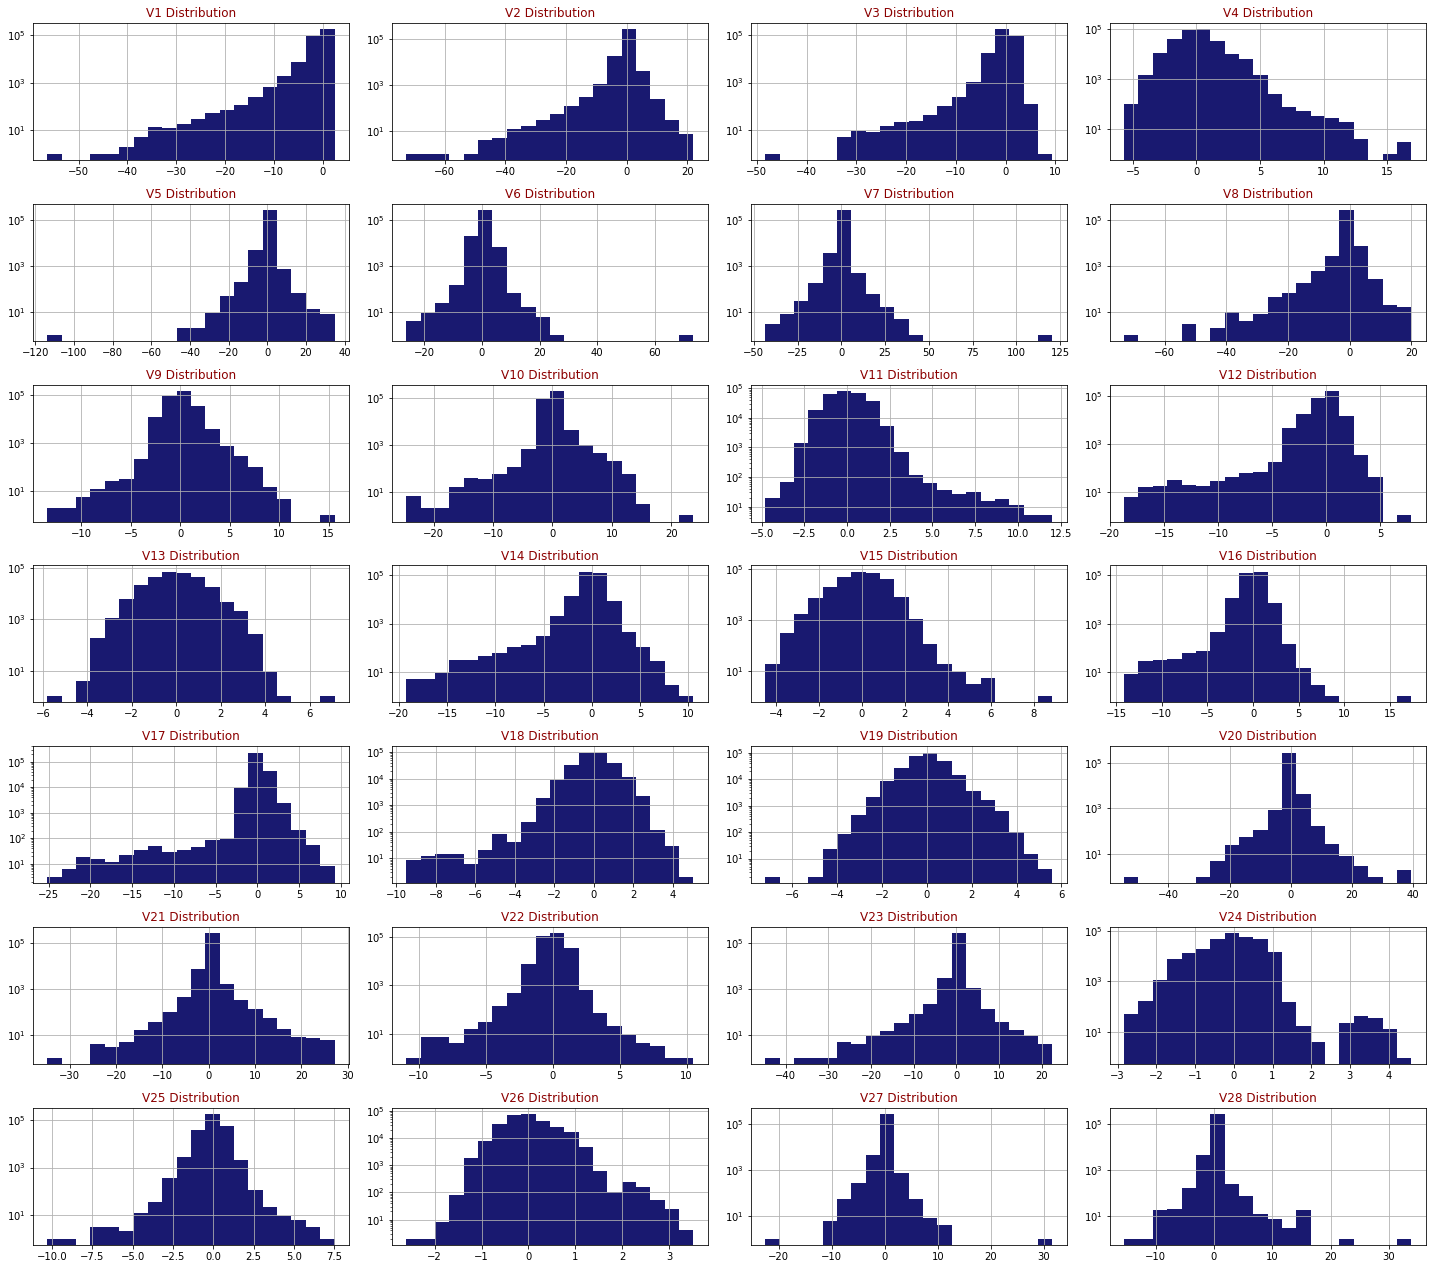

In [228]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(data,V,8,4)

##### OUTLIERS CHECK

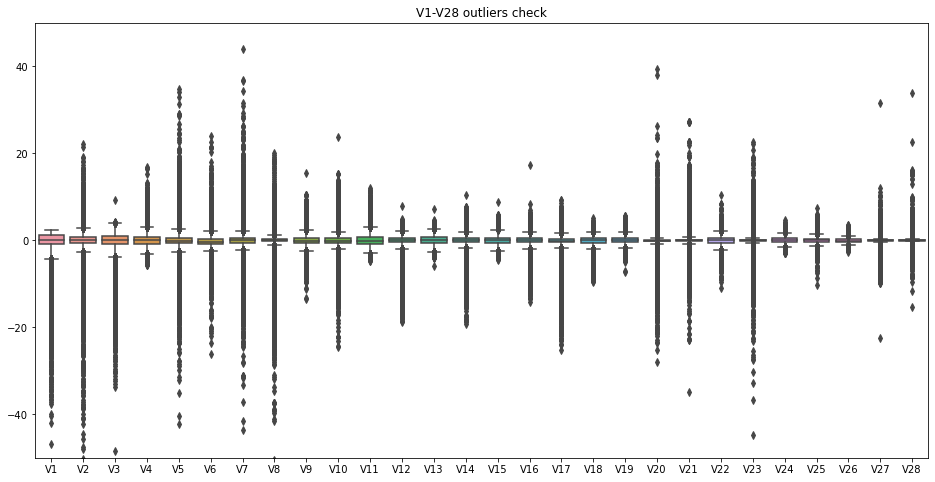

In [97]:
fig2 = plt.figure(figsize=(16,8))
ax = fig2.add_subplot(111)
sns.boxplot(data = features[V])
ax.set_ylim([-50,50])
ax.set_title("V1-V28 outliers check");

The box plot for V1-V28 variable is hard to read. We notice that there is a lot of outliers for each variables, so lets look at a more robust statistic

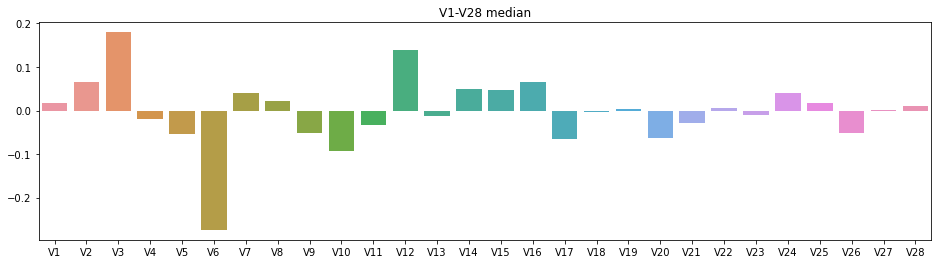

In [101]:
fig3 = plt.figure(figsize=(16,4))
ax = fig3.add_subplot(111)
sns.barplot(x=V, y=features[V].median())
ax.set_title("V1-V28 median");

The median for each variable still near 0

##### COREELATIONS :

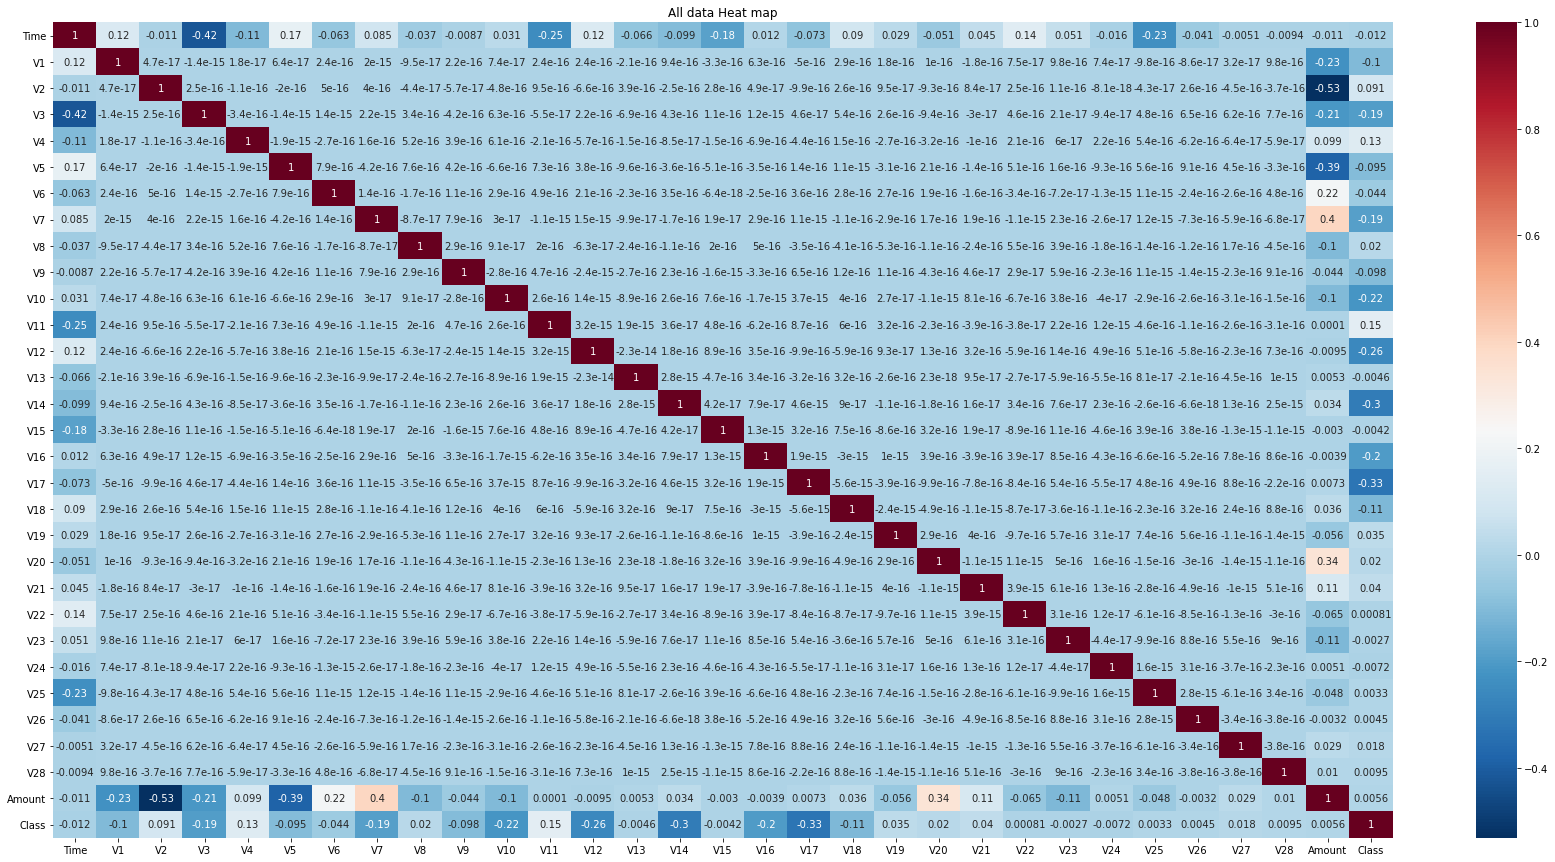

In [213]:
M = data.corr(method="pearson")
plt.figure(figsize=(30,15))
sns.heatmap(M,annot=True,cmap = "RdBu_r")
plt.title("All data Heat map");

##### Correlations Class - other vars

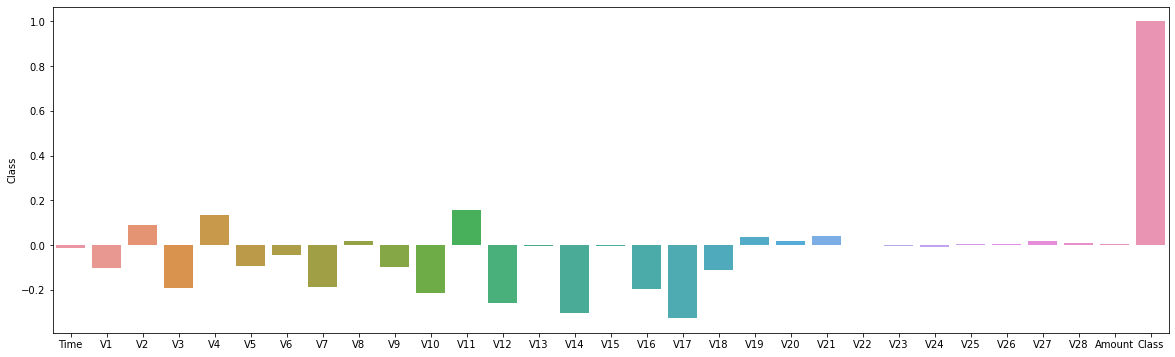

In [212]:
col = list(M.columns)
plt.figure(figsize=(20,6))
sns.barplot(x=col, y=M.Class);

Five highest linear correlation in decreasing order :
V17 - V14 - V12 - V10 - V7